<a href="https://colab.research.google.com/github/Susmi0350/Heart-Disease-Prediction/blob/main/Heart_disease_prediction_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing essential libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


**Understanding dataset**

In [ ]:
dataset = pd.read_csv("heart.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0


Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**Analysis of Target Variable**

In [ ]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
dataset["target"].unique()

array([1, 0])

**Checking correlation between columns**

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


**Exploratory Data Analysis**

Analysing the target variable

target
1    165
0    138
Name: count, dtype: int64


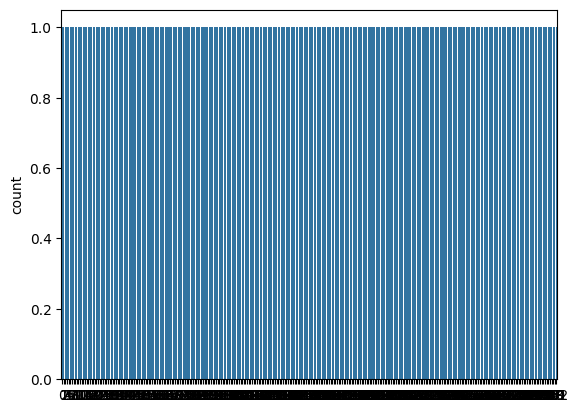

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

**Analysing the 'Sex' feature**

In [ ]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

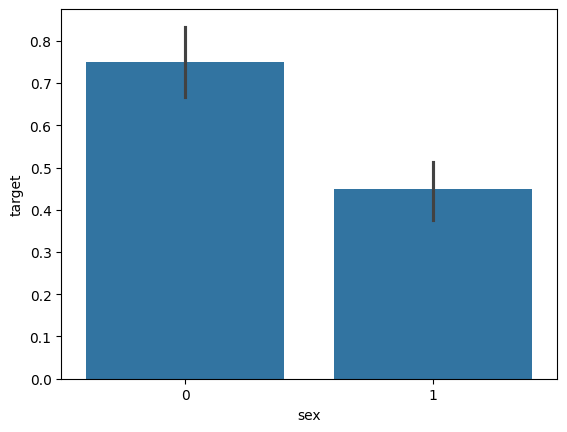

In [ ]:
sns.barplot(x=dataset["sex"],y=y)

We notice, that females are more likely to have heart problems than males

**Analysing the 'Chest Pain Type' feature**

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='target'>

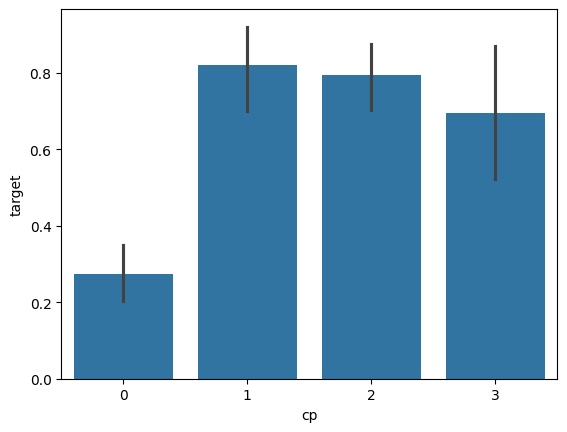

In [ ]:
sns.barplot(x=dataset["cp"],y=y)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems


**Analysing the FBS feature**

In [ ]:
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

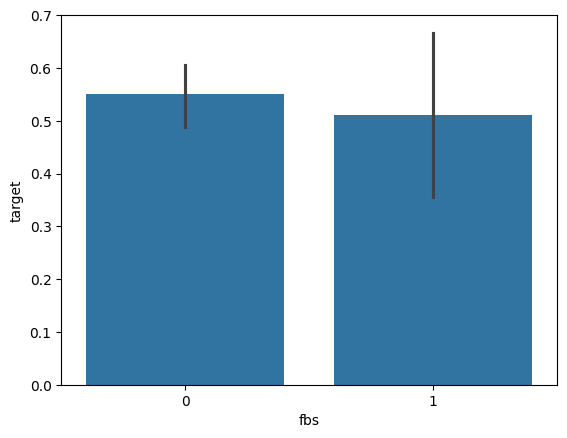

In [ ]:
sns.barplot(x=dataset["fbs"],y=y)

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

**Analysing the restecg feature**

<Axes: xlabel='restecg', ylabel='target'>

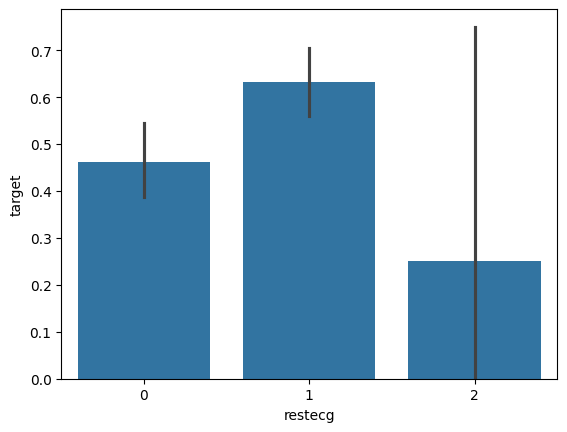

In [ ]:
sns.barplot(x=dataset["restecg"],y=y)

**Analysing the 'exang' feature**

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

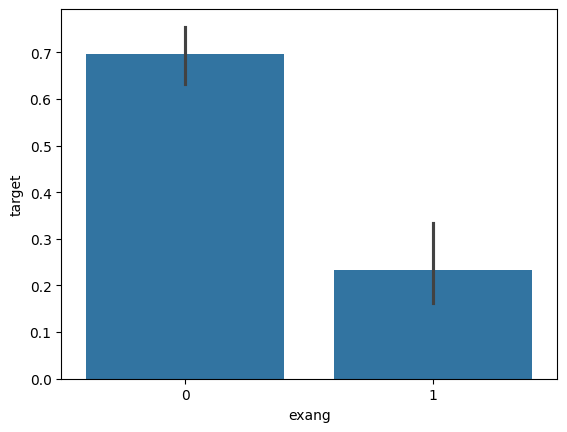

In [ ]:
sns.barplot(x=dataset["exang"],y=y)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

**Analysing the Slope feature**

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

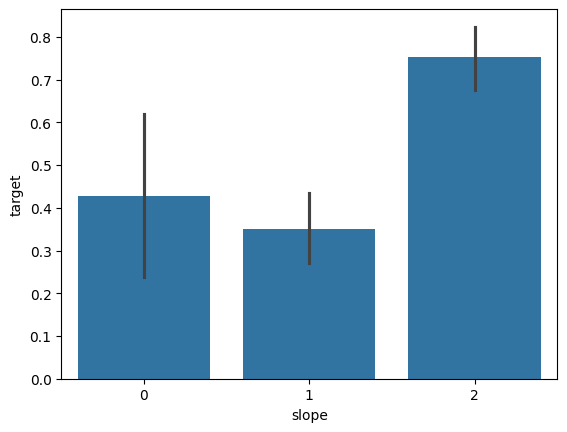

In [ ]:
sns.barplot(x=dataset["slope"],y=y)

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

**Analysing the 'ca' feature**

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

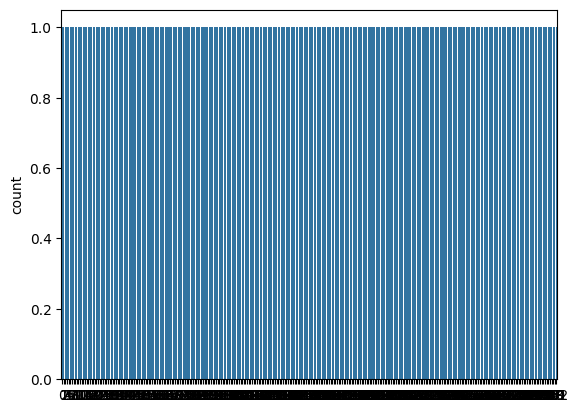

In [ ]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

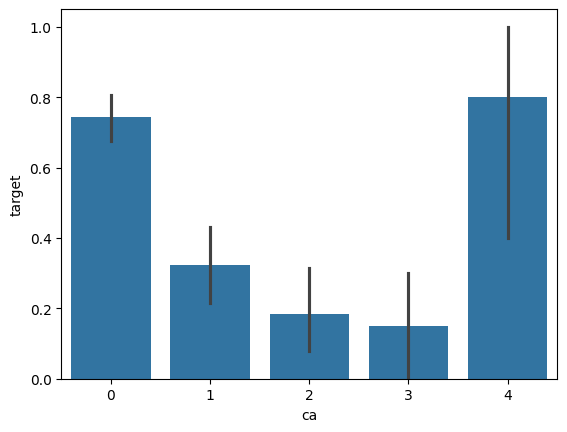

In [ ]:
sns.barplot(x=dataset["ca"],y=y)

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

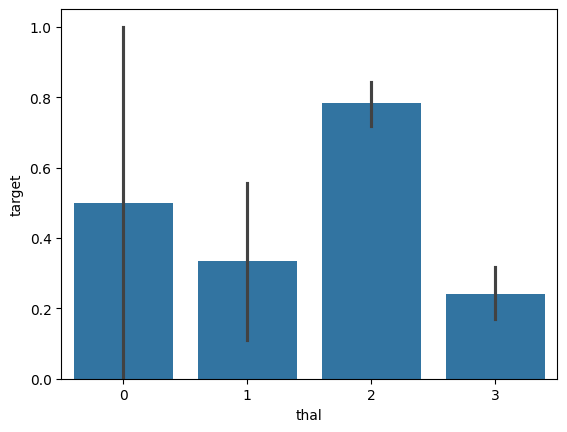

In [ ]:
sns.barplot(x=dataset["thal"],y=y)

<Axes: xlabel='thal', ylabel='Density'>

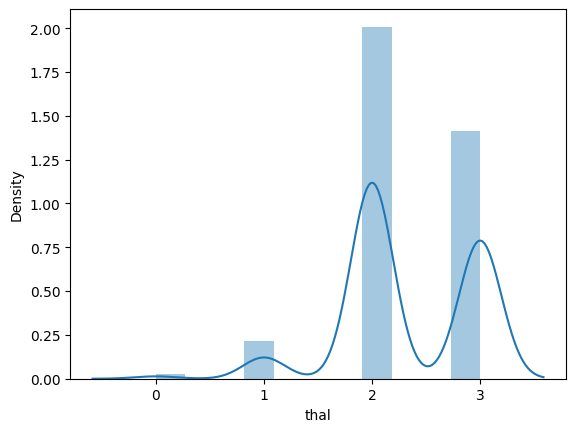

In [ ]:
sns.distplot(dataset["thal"])

**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

** Model Fitting**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
a_score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
r_score_lr = round(recall_score(Y_pred_lr,Y_test)*100,2)
p_score_lr = round(precision_score(Y_pred_lr,Y_test)*100,2)
f1_score_lr = round(f1_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(a_score_lr)+" %")
print("The precision score achieved using Logistic Regression is: "+str(p_score_lr)+" %")
print("The recall score achieved using Logistic Regression is: "+str(r_score_lr)+" %")
print("The f1 score achieved using Logistic Regression is: "+str(f1_score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The precision score achieved using Logistic Regression is: 88.24 %
The recall score achieved using Logistic Regression is: 85.71 %
The f1 score achieved using Logistic Regression is: 86.96 %


In [ ]:
from sklearn.metrics import classification_report

# You already trained and predicted
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)

# ✅ Generate and print the classification report
print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred_lr))



Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61




Confusion Matrix:
 [[22  5]
 [ 4 30]]


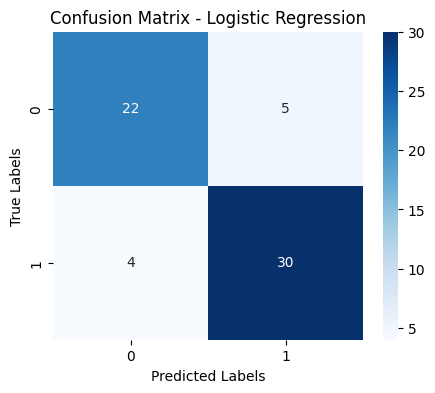

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_lr)
print("\nConfusion Matrix:\n", cm)

# ✅ 3. (Optional) Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
a_score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
r_score_nb = round(recall_score(Y_pred_nb,Y_test)*100,2)
p_score_nb = round(precision_score(Y_pred_nb,Y_test)*100,2)
f1_score_nb = round(f1_score(Y_pred_nb,Y_test)*100,2)


print("The accuracy score achieved using Naive Bayes is: "+str(a_score_nb)+" %")
print("The precision score achieved using Naive Bayes is: "+str(p_score_nb)+" %")
print("The recall score achieved using Naive Bayes is: "+str(r_score_nb)+" %")
print("The f1 score achieved using Naive Bayes is: "+str(f1_score_nb)+" %")


The accuracy score achieved using Naive Bayes is: 85.25 %
The precision score achieved using Naive Bayes is: 91.18 %
The recall score achieved using Naive Bayes is: 83.78 %
The f1 score achieved using Naive Bayes is: 87.32 %



Classification Report (Naive Bayes):

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix:
 [[21  6]
 [ 3 31]]


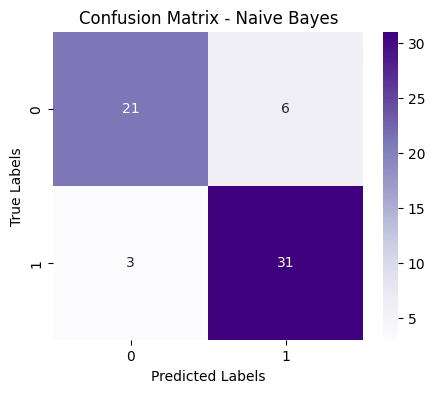

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, Y_train)

# 2️⃣ Make predictions
Y_pred_nb = nb.predict(X_test)

# 3️⃣ Classification Report
print("\nClassification Report (Naive Bayes):\n")
print(classification_report(Y_test, Y_pred_nb))

# 4️⃣ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_nb)
print("\nConfusion Matrix:\n", cm)

# 5️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**SVM**

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
a_score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
r_score_svm = round(recall_score(Y_pred_svm,Y_test)*100,2)
p_score_svm = round(precision_score(Y_pred_svm,Y_test)*100,2)
f1_score_svm = round(f1_score(Y_pred_svm,Y_test)*100,2)


print("The accuracy score achieved using Linear SVM is: "+str(a_score_svm)+" %")
print("The precision score achieved using Naive Bayes is: "+str(p_score_svm)+" %")
print("The recall score achieved using Naive Bayes is: "+str(r_score_svm)+" %")
print("The f1 score achieved using Naive Bayes is: "+str(f1_score_svm)+" %")


The accuracy score achieved using Linear SVM is: 81.97 %
The precision score achieved using Naive Bayes is: 88.24 %
The recall score achieved using Naive Bayes is: 81.08 %
The f1 score achieved using Naive Bayes is: 84.51 %



Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61


Confusion Matrix:
 [[20  7]
 [ 4 30]]


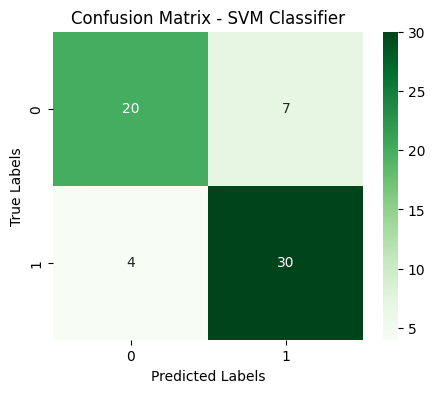

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Initialize and train the SVM model
svm_model = SVC(kernel='linear')   # you can also try 'rbf', 'poly', 'sigmoid'
svm_model.fit(X_train, Y_train)

# 2️⃣ Make predictions
Y_pred_svm = svm_model.predict(X_test)

# 3️⃣ Classification Report
print("\nClassification Report (SVM):\n")
print(classification_report(Y_test, Y_pred_svm))

# 4️⃣ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_svm)
print("\nConfusion Matrix:\n", cm)

# 5️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
a_score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
p_score_knn = round(precision_score(Y_pred_knn,Y_test)*100,2)
r_score_knn = round(recall_score(Y_pred_knn,Y_test)*100,2)
f1_score_knn = round(f1_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(a_score_knn)+" %")
print("The precision score achieved using Naive Bayes is: "+str(p_score_knn)+" %")
print("The recall score achieved using Naive Bayes is: "+str(r_score_knn)+" %")
print("The f1 score achieved using Naive Bayes is: "+str(f1_score_knn)+" %")




The accuracy score achieved using KNN is: 67.21 %
The precision score achieved using Naive Bayes is: 67.65 %
The recall score achieved using Naive Bayes is: 71.88 %
The f1 score achieved using Naive Bayes is: 69.7 %



Classification Report (KNN):

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61


Confusion Matrix:
 [[17 10]
 [12 22]]


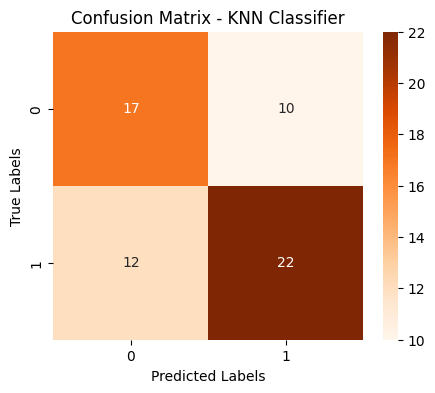

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)   # you can change n_neighbors to tune performance
knn.fit(X_train, Y_train)

# 2️⃣ Make predictions
Y_pred_knn = knn.predict(X_test)

# 3️⃣ Classification Report
print("\nClassification Report (KNN):\n")
print(classification_report(Y_test, Y_pred_knn))

# 4️⃣ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
print("\nConfusion Matrix:\n", cm)

# 5️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - KNN Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
a_score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
p_score_dt = round(precision_score(Y_pred_dt,Y_test)*100,2)
r_score_dt = round(recall_score(Y_pred_dt,Y_test)*100,2)
f1_score_dt = round(f1_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(a_score_dt)+" %")
print("The precision score achieved using Decision Tree is: "+str(p_score_dt)+" %")
print("The recall score achieved using Decision Tree is: "+str(r_score_dt)+" %")
print("The f1 score achieved using Decision Tree is: "+str(f1_score_dt)+" %")



The accuracy score achieved using Decision Tree is: 81.97 %
The precision score achieved using Decision Tree is: 82.35 %
The recall score achieved using Decision Tree is: 84.85 %
The f1 score achieved using Decision Tree is: 83.58 %



Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


Confusion Matrix:
 [[22  5]
 [ 8 26]]


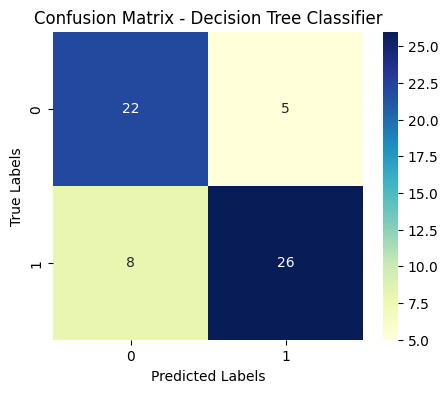

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt.fit(X_train, Y_train)

# 2️⃣ Make predictions
Y_pred_dt = dt.predict(X_test)

# 3️⃣ Classification Report
print("\nClassification Report (Decision Tree):\n")
print(classification_report(Y_test, Y_pred_dt))

# 4️⃣ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_dt)
print("\nConfusion Matrix:\n", cm)

# 5️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
a_score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
p_score_rf = round(precision_score(Y_pred_rf,Y_test)*100,2)
r_score_rf = round(recall_score(Y_pred_rf,Y_test)*100,2)
f1_score_rf = round(f1_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(a_score_rf)+" %")
print("The precision score achieved using Random Forest is: "+str(p_score_dt)+" %")
print("The recall score achieved using Random Forest is: "+str(r_score_dt)+" %")
print("The f1 score achieved using Random Forest is: "+str(f1_score_dt)+" %")


The accuracy score achieved using Random Forest is: 90.16 %
The precision score achieved using Random Forest is: 82.35 %
The recall score achieved using Random Forest is: 84.85 %
The f1 score achieved using Random Forest is: 83.58 %



Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix:
 [[22  5]
 [ 4 30]]


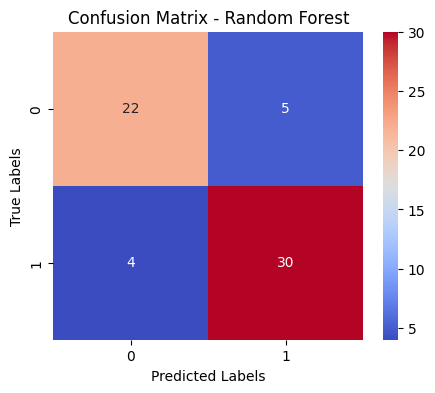

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf.fit(X_train, Y_train)

# 2️⃣ Make predictions
Y_pred_rf = rf.predict(X_test)

# 3️⃣ Classification Report
print("\nClassification Report (Random Forest):\n")
print(classification_report(Y_test, Y_pred_rf))

# 4️⃣ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print("\nConfusion Matrix:\n", cm)

# 5️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**XGBoost**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
a_score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
p_score_xgb = round(precision_score(Y_pred_xgb,Y_test)*100,2)
r_score_xgb= round(recall_score(Y_pred_xgb,Y_test)*100,2)
f1_score_xgb = round(f1_score(Y_pred_xgb,Y_test)*100,2)


print("The accuracy score achieved using XGBoost is: "+str(a_score_xgb)+" %")
print("The precision score achieved using XGBoost is: "+str(p_score_xgb)+" %")
print("The recall score achieved using XGBoost is: "+str(r_score_xgb)+" %")
print("The f1 score achieved using XGBoost is: "+str(f1_score_xgb)+" %")


The accuracy score achieved using XGBoost is: 83.61 %
The precision score achieved using XGBoost is: 85.29 %
The recall score achieved using XGBoost is: 85.29 %
The f1 score achieved using XGBoost is: 85.29 %



Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
 [[22  5]
 [ 5 29]]


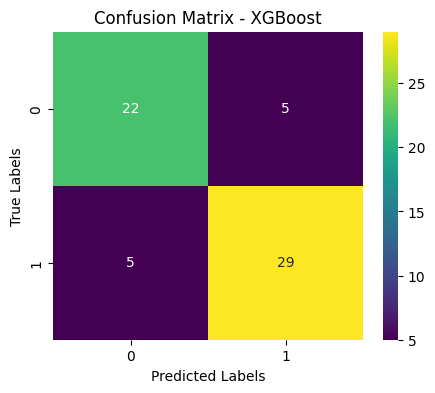

In [ ]:
# 1️⃣ Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2️⃣ Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

# 3️⃣ Make predictions
Y_pred_xgb = xgb_model.predict(X_test)

# 4️⃣ Classification Report
print("\nClassification Report (XGBoost):\n")
print(classification_report(Y_test, Y_pred_xgb))

# 5️⃣ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_xgb)
print("\nConfusion Matrix:\n", cm)

# 6️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4264 - loss: 62.2752
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4406 - loss: 53.5045
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5039 - loss: 41.9822
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4713 - loss: 37.6825
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4681 - loss: 33.0152
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4706 - loss: 27.1878
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4654 - loss: 20.8510
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4507 - loss: 16.3717
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4523 - loss: 10.2363
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4736 - loss: 4.5613
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5506 - loss: 2.7155
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.

In [ ]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
a_score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
p_score_nn = round(precision_score(Y_pred_nn,Y_test)*100,2)
r_score_nn= round(recall_score(Y_pred_nn,Y_test)*100,2)
f1_score_nn = round(f1_score(Y_pred_nn,Y_test)*100,2)


print("The accuracy score achieved using Neural Network is: "+str(a_score_nn)+" %")
print("The precision score achieved using Neural Networks is: "+str(p_score_nn)+" %")
print("The recall score achieved using Neural Networks is: "+str(r_score_nn)+" %")
print("The f1 score achieved using Neural Networks is: "+str(f1_score_nn)+" %")



The accuracy score achieved using Neural Network is: 78.69 %
The precision score achieved using Neural Networks is: 82.35 %
The recall score achieved using Neural Networks is: 80.0 %
The f1 score achieved using Neural Networks is: 81.16 %



Classification Report (Neural Network):

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        27
           1       0.88      0.65      0.75        34

    accuracy                           0.75        61
   macro avg       0.77      0.77      0.75        61
weighted avg       0.79      0.75      0.75        61


Confusion Matrix:
 [[24  3]
 [12 22]]


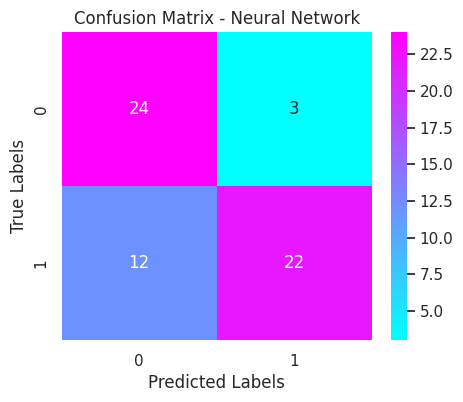

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Initialize and train the Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                   max_iter=500, random_state=42)
nn.fit(X_train, Y_train)

# 2️⃣ Make predictions
Y_pred_nn = nn.predict(X_test)

# 3️⃣ Classification Report
print("\nClassification Report (Neural Network):\n")
print(classification_report(Y_test, Y_pred_nn))

# 4️⃣ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_nn)
print("\nConfusion Matrix:\n", cm)

# 5️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Output final score**

In [ ]:
scores = [a_score_lr,a_score_nb,a_score_svm,a_score_knn,a_score_dt,a_score_rf,a_score_xgb,a_score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 78.69 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

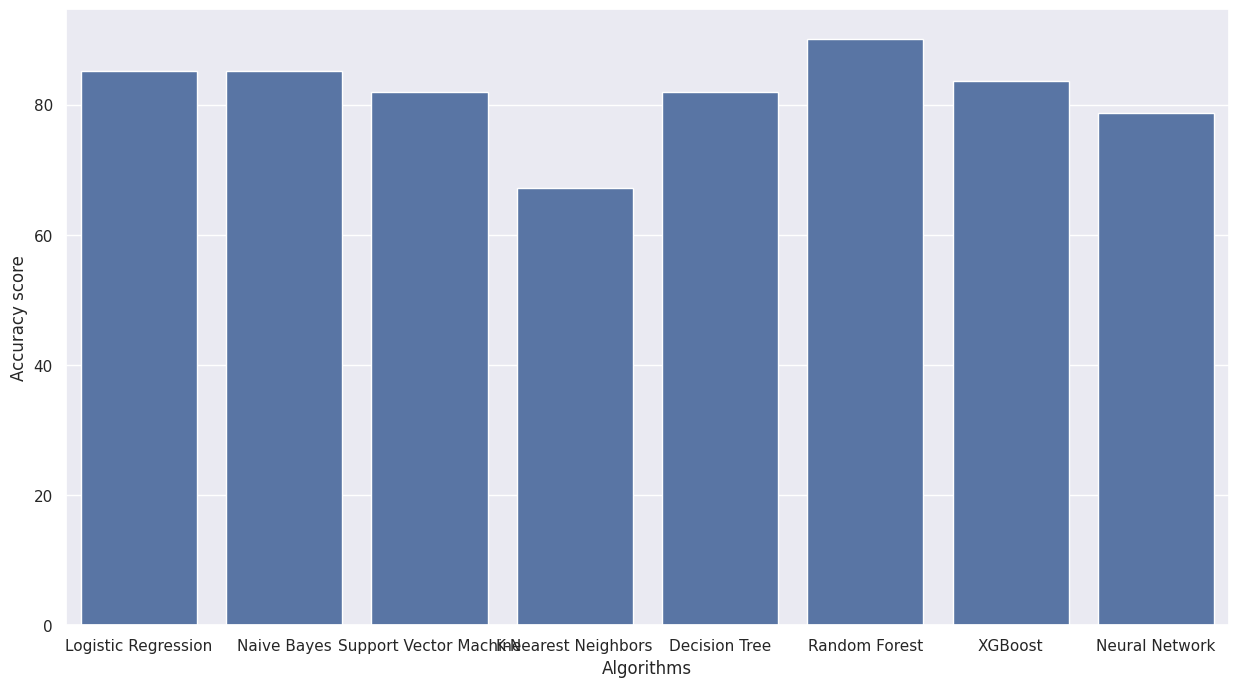

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

In [ ]:
scores1 = [f1_score_lr,f1_score_nb,f1_score_svm,f1_score_knn,f1_score_dt,f1_score_rf,f1_score_xgb,f1_score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The f1 score achieved using "+algorithms[i]+" is: "+str(scores1[i])+" %")

The f1 score achieved using Logistic Regression is: 86.96 %
The f1 score achieved using Naive Bayes is: 87.32 %
The f1 score achieved using Support Vector Machine is: 84.51 %
The f1 score achieved using K-Nearest Neighbors is: 83.58 %
The f1 score achieved using Decision Tree is: 83.58 %
The f1 score achieved using Random Forest is: 91.43 %
The f1 score achieved using XGBoost is: 85.29 %
The f1 score achieved using Neural Network is: 81.16 %


<Axes: xlabel='Algorithms', ylabel='F1 score'>

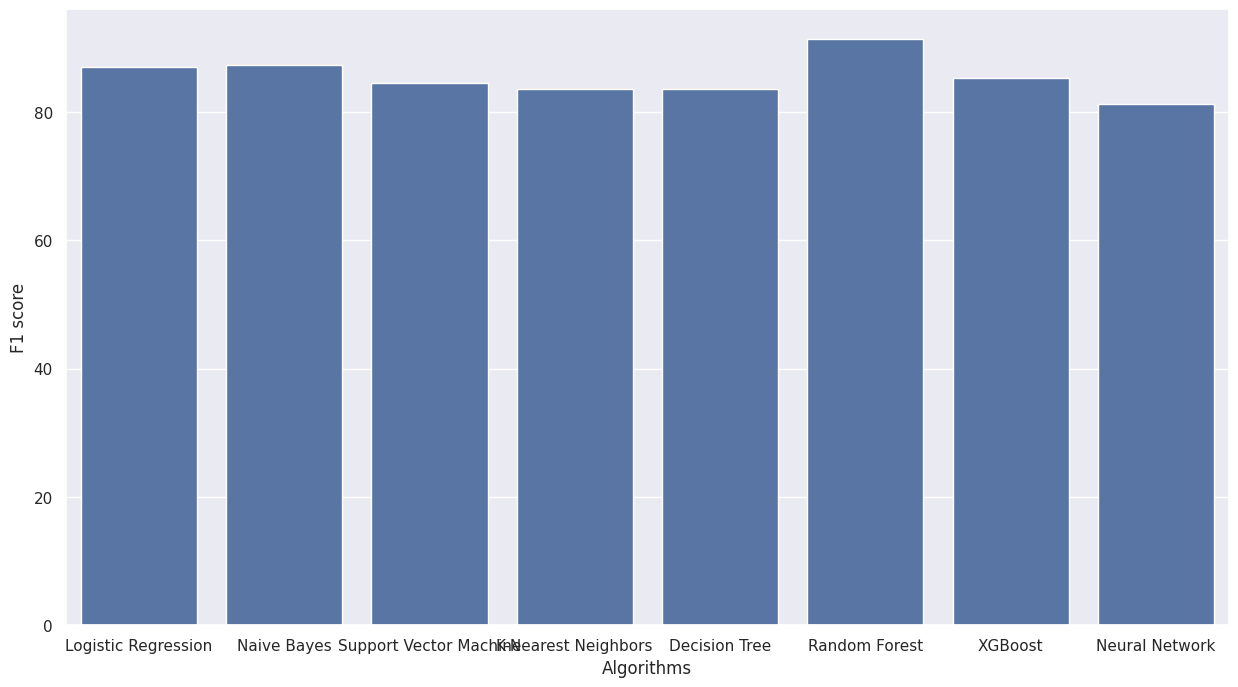

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("F1 score")

sns.barplot(x=algorithms,y=scores1)

**Random forest has good result as compare to other algorithms**